In [1]:
from preprocess_images import *
import pandas as pd
import os, glob
import cv2 as cv
import imgaug as ia
from imgaug import augmenters as iaa

In [2]:
# This is needed to display the images.
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (9, 9)

In [3]:
# original images
PATH_TO_ANNO = '../annotations/'
ANNO_TABLE = 'bus_labels.csv'
PATH_TO_IMAGES = '../images/'
PATH_TO_RESIZED_IMAGES = '../images/resized/'
# augmented images
PATH_TO_AUG_IMAGES = 'images/'

In [4]:
df = pd.read_csv(os.path.join(PATH_TO_ANNO, ANNO_TABLE))

In [5]:
df.head(6)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,DSCF1013.JPG,3648,2736,bus,1217,1690,1706,1891
1,DSCF1013.JPG,3648,2736,bus,1774,1619,2249,1843
2,DSCF1013.JPG,3648,2736,bus,2313,1566,2773,1794
3,DSCF1013.JPG,3648,2736,bus,1284,1832,1781,2063
4,DSCF1013.JPG,3648,2736,bus,1879,1798,2365,2026
5,DSCF1013.JPG,3648,2736,bus,2429,1742,2904,1970


In [6]:
imresize_to_300x225(PATH_TO_IMAGES, PATH_TO_RESIZED_IMAGES, df=df)

In [7]:
df.head(6)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,s_DSCF1013.JPG,300,225,bus,100,138,140,155
1,s_DSCF1013.JPG,300,225,bus,145,133,184,151
2,s_DSCF1013.JPG,300,225,bus,190,128,228,147
3,s_DSCF1013.JPG,300,225,bus,105,150,146,169
4,s_DSCF1013.JPG,300,225,bus,154,147,194,166
5,s_DSCF1013.JPG,300,225,bus,199,143,238,162


In [8]:
[filenames_s, images, bboxes] = get_images_bboxes(df=df, path_to_images=PATH_TO_RESIZED_IMAGES)

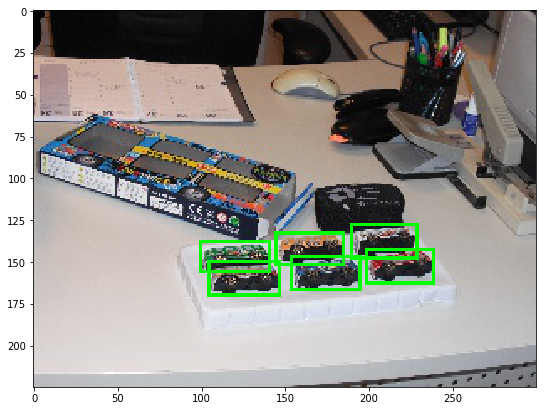

In [9]:
imshow_bbox(images, bboxes, 1)

In [10]:
sometimes = lambda aug: iaa.Sometimes(0.8, aug)
seq = iaa.Sequential([iaa.Multiply(mul=(0.75, 1.25)),
                    iaa.Add(value=(-25,25)),
                    iaa.Fliplr(0.5),
                    iaa.Flipud(0.5),
                    iaa.OneOf([
                    iaa.CoarseDropout((0.0, 0.05), size_percent=(0.02, 0.25)),
                    iaa.AdditiveGaussianNoise(scale=(0, 0.02*255))]),
                    sometimes(iaa.Affine(
                            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale images to 80-120% of their size, individually per axis
                            translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}, # translate by -20 to +20 percent (per axis)
                            rotate=(-45, 45), # rotate by -45 to +45 degrees
                            shear=(-16, 16), # shear by -16 to +16 degrees
                            order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
                            cval=0, # if mode is constant, use a cval between 0 and 255
                        ))])
seq_det = seq.to_deterministic() # call this for each batch again, NOT only once at the start

In [11]:
images_aug = seq_det.augment_images(images)
bboxes_aug = seq_det.augment_bounding_boxes(bboxes)

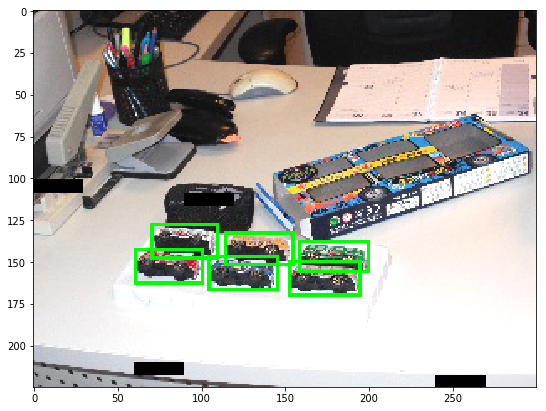

In [12]:
imshow_bbox(images_aug, bboxes_aug, 1)

In [13]:
df_test = imwrite_aug_ssd(images_aug, filenames_s, bboxes_aug, PATH_TO_AUG_IMAGES, None)

In [14]:
df_test.head(16)

,filename,width,height,class,xmin,ymin,xmax,ymax,path
0,aug_s_DSCF1013.JPG,300,300,bus,159,175,199,192,images/
1,aug_s_DSCF1013.JPG,300,300,bus,115,170,154,188,images/
2,aug_s_DSCF1013.JPG,300,300,bus,71,165,109,184,images/
3,aug_s_DSCF1013.JPG,300,300,bus,153,187,194,206,images/
4,aug_s_DSCF1013.JPG,300,300,bus,105,184,145,203,images/
5,aug_s_DSCF1013.JPG,300,300,bus,61,180,100,199,images/
6,aug_s_DSCF1015.JPG,300,300,bus,98,142,193,245,images/
7,aug_s_DSCF1015.JPG,300,300,bus,4,175,93,266,images/
8,aug_s_DSCF1016.JPG,300,300,bus,128,133,235,223,images/
9,aug_s_DSCF1016.JPG,300,300,bus,141,61,239,144,images/


In [15]:
[_, images_aug, bboxes_aug] = get_images_bboxes(df=df_test, path_to_images=PATH_TO_AUG_IMAGES)

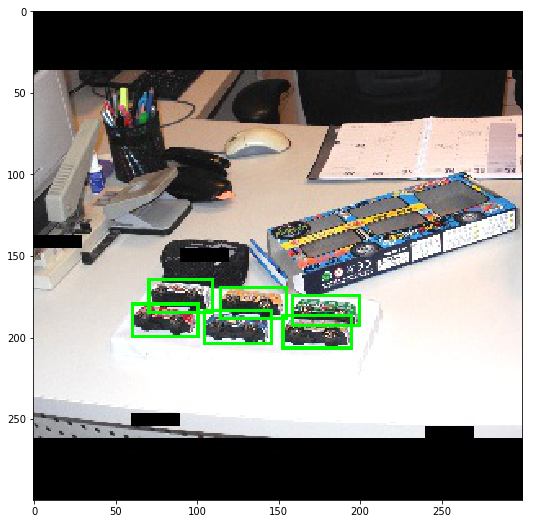

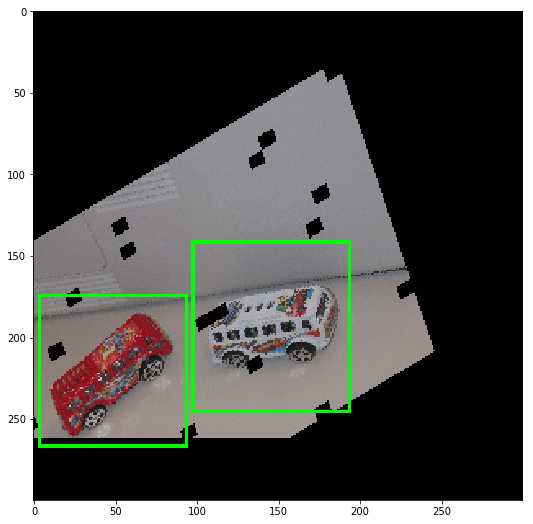

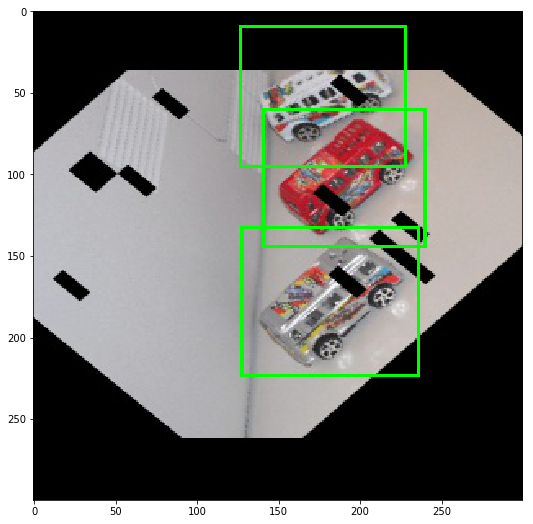

In [16]:
imshow_bbox(images_aug, bboxes_aug, 3)